Linear Regression with Multiple Variables

# Dataset and setup

- X has 8 examples and 4 features per example (shape: 8×4).
- y holds the target house prices in dollars.

We'll learn weights w (one per feature) and a bias b to predict price from features.

In [1]:
import numpy as np

x = np.array([
    [2104, 3, 10, 5],
    [1600, 3, 20, 8],
    [2400, 3, 15, 3],
    [1416, 2, 30, 12],
    [3000, 4, 8, 2],
    [1985, 4, 25, 9],
    [1534, 3, 35, 15],
    [1427, 2, 40, 20]
])

# Prices (target)
y = np.array([399900, 329900, 369000, 232000, 539900, 299900, 199000, 149000])


In [2]:
def prediction(x , w, b):
    return float(np.dot(w , x) + b)

# Prediction function

For a single example x (length-4 vector), the model predicts:

ŷ = w · x + b

We'll reuse this in cost and gradient calculations.

In [3]:
def compute_cost(x , y ,w , b):
    m = x.shape[0]
    total_cost = 0.0
    for i in range(m):
        total_cost += (prediction(x[i] , w , b) - y[i]) ** 2
    return total_cost / (2*m)

# Cost (Mean Squared Error)

We measure how well the model fits the data using the average squared error:

J(w, b) = (1/2m) Σ_i (ŷ_i - y_i)^2

Lower cost means better fit.

In [4]:
# Quick sanity cost check with zeros
print(f"Compute cost with zeros: {compute_cost(x, y, np.zeros(x.shape[1]), 0):.2e}")

Compute cost with zeros: 5.64e+10


In [5]:
def compute_gradients(x , y , w , b):
    m , n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    for i in range(m):
        err = prediction(x[i] , w, b) - y[i] 
        for j in range(n):
            dj_dw[j] += err * x[i , j]
        dj_db += err
    return dj_dw / m , dj_db / m

# Gradients

We compute partial derivatives of J with respect to each weight w_j and bias b. These tell us how to update parameters to reduce the cost.

In [6]:
def gradient_descent(x , y , w, b , alpha , num_iters):
    compute_history = []
    for i in range(num_iters):
        dj_dw , dj_db = compute_gradients(x , y, w , b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if(i%10000 == 0):
            cost = compute_cost(x , y, w, b)
            compute_history.append(cost) 
            print(f"iter:{i:6d} cost:{cost:.2e}")
    return w , b , compute_history

# Gradient Descent

Iteratively update parameters:
- w := w - α ∂J/∂w
- b := b - α ∂J/∂b

We also log cost every 10,000 steps to monitor progress.

In [11]:
w, b, compute_history = gradient_descent(
    x, y,
    np.zeros(x.shape[1]), 0.0,
    alpha=1e-7, num_iters=20000
)
print(f"Final parameters:\n w = {w}\n b = {b}")
print(f"Final cost = {compute_cost(x, y, w, b)}")

iter:     0 cost:2.11e+10
iter:  1000 cost:1.28e+09
iter:  2000 cost:1.24e+09
iter:  3000 cost:1.21e+09
iter:  4000 cost:1.18e+09
iter:  5000 cost:1.15e+09
iter:  6000 cost:1.12e+09
iter:  7000 cost:1.09e+09
iter:  8000 cost:1.07e+09
iter:  9000 cost:1.05e+09
iter: 10000 cost:1.03e+09
iter: 11000 cost:1.01e+09
iter: 12000 cost:9.87e+08
iter: 13000 cost:9.69e+08
iter: 14000 cost:9.53e+08
iter: 15000 cost:9.37e+08
iter: 16000 cost:9.22e+08
iter: 17000 cost:9.08e+08
iter: 18000 cost:8.95e+08
iter: 19000 cost:8.83e+08
Final parameters:
 w = [ 175.4740639    -2.23562391 -840.97799015 -385.53632747]
 b = -6.6436925341631925
Final cost = 871449889.7196572


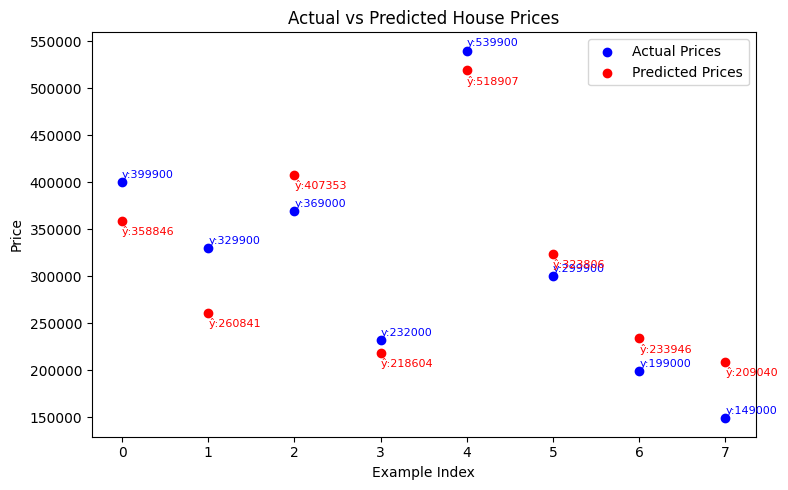

In [12]:
import matplotlib.pyplot as plt

predictions = x @ w + b
plt.figure(figsize=(8,5))
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Prices')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Example Index")
plt.ylabel("Price")
plt.legend()

# Add text labels for clarity (optional; can be noisy)
for i in range(len(y)):
    plt.text(i, y[i] + 5000, f"y:{int(y[i])}", color='blue', fontsize=8)
    plt.text(i, predictions[i] - 15000, f"ŷ:{int(predictions[i])}", color='red', fontsize=8)

plt.tight_layout()
plt.show()

# Visualizing predictions

After training, we compare actual prices vs. model predictions to see how well the model fits this small dataset.